# 1.	Determine la Transformada de Fourier de x(t) = 10 sen 50π t y x(t) = 3 + 10 sen 50π t. Discretizar para t = 5 x 10-3, 10x10-3, ... 1.28 segundos, es decir, tomar 256 puntos (32 ciclos). Grafique (|X(f)|,f), comente y compare ambos resultados.

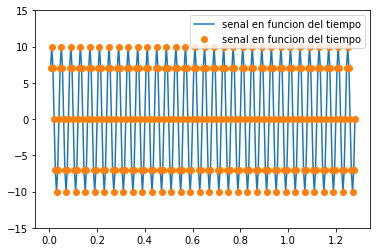

In [19]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.005 # paso de tiempo
df = 1/dt # frecuencia de muestreo
N1 = 256 # numero de puntos
T1 = dt*N1 # tiempo final
t = np.arange(dt, T1,dt) # discretizacion temporal
t2 = np.linspace(dt, T1, N1, endpoint=True)
x = 10*np.sin(50*np.pi*t) # senal disretizada

# plots..
plt.figure()
plt.plot(t, x, label = 'senal en funcion del tiempo')
plt.plot(t, x,'o' ,label = 'senal en funcion del tiempo')
#plt.scatter(t, x, label ='puntos discretos', c='r')
plt.ylim(-15, 15)
plt.legend()
plt.show()




notar que la senal no es periodica, ya que le estamos entregando una senal que empieza en cierta altura, primer circulo naranjo, y termina en el ultimo punto naranjo en ekl origen , lo cual implica que no es una senal periodica. de todos mosdos funciona porque?, porque se autocompleta el uktimo punto ? idk

* ahora vamos a pasar la senal del dominio dek tiempo al domino de las frecucnias


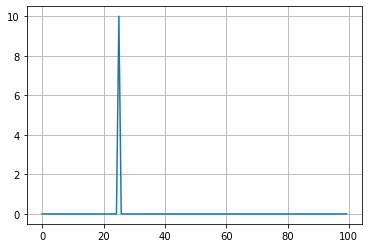

In [38]:
from scipy.fft import fft, fftfreq

xf_crudo = fft(x)
w_crudo = fftfreq(len(t), dt)

# tenemos que hacer ciuertas manipuaciones a estos arrays para conseguir solo frecuencias postivas y que ademas se converve la energia

xf = 2/len(xf_crudo)*np.abs(xf_crudo[0:len(xf_crudo)//2])
wf = w_crudo[:len(w_crudo)//2]

plt.plot(wf, xf)
plt.grid()
plt.show()

* ahora hacemos lo mismo con la otra senal x(t) = 3 + 10 sen 50π t.

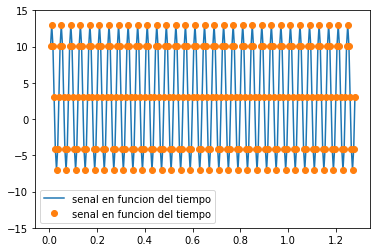

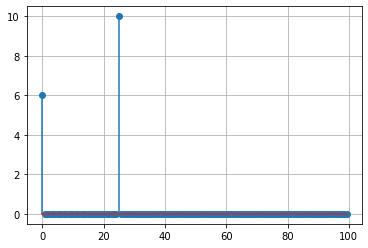

In [42]:
dt = 0.005 # paso de tiempo
df = 1/dt # frecuencia de muestreo
N1 = 256 # numero de puntos
T1 = dt*N1 # tiempo final
t = np.arange(dt, T1,dt) # discretizacion temporal
t2 = np.linspace(dt, T1, N1, endpoint=True)
x = 3 + 10*np.sin(50*np.pi*t) # senal disretizada

# plots..
plt.figure()
plt.plot(t, x, label = 'senal en funcion del tiempo')
plt.plot(t, x,'o' ,label = 'senal en funcion del tiempo')
#plt.scatter(t, x, label ='puntos discretos', c='r')
plt.ylim(-15, 15)
plt.legend()
plt.show()

from scipy.fft import fft, fftfreq

xf_crudo = fft(x)
w_crudo = fftfreq(len(t), dt)

# tenemos que hacer ciuertas manipuaciones a estos arrays para conseguir solo frecuencias postivas y que ademas se converve la energia

xf = 2/len(xf_crudo)*np.abs(xf_crudo[0:len(xf_crudo)//2]) # se multiplica por 2 para mantener la energia
wf = w_crudo[:len(w_crudo)//2]

plt.stem(wf, xf)
plt.grid()
plt.show()

2.	Determinar la Transformada de Fourier x(t) = 10 sen 50π t. Discretizar para t = 5 x 10-3, 10x10-3, ... 1.3, es decir, tomar 260 puntos (32,5 ciclos). Grafique (|X(f)|,f), comente y compare con 1.

* notar que no es un ciclo entero. (32.5) ciclos, ya que la freq es 25 hz (2*pi*f) y el timepo final es 1.3 seg ---> 1.3*25 = 32.5 ciclos

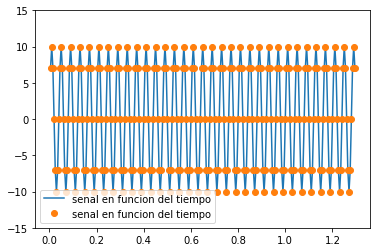

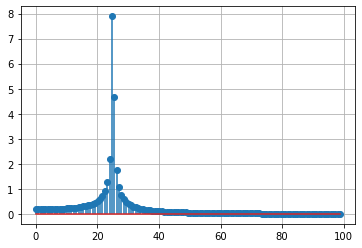

In [41]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.005 # paso de tiempo
df = 1/dt # frecuencia de muestreo
N1 = 260 # numero de puntos
T1 = dt*N1 # tiempo final
t = np.arange(dt, T1,dt) # discretizacion temporal
t2 = np.linspace(dt, T1, N1, endpoint=True)
x = 10*np.sin(50*np.pi*t) # senal disretizada

# plots..
plt.figure()
plt.plot(t, x, label = 'senal en funcion del tiempo')
plt.plot(t, x,'o' ,label = 'senal en funcion del tiempo')
#plt.scatter(t, x, label ='puntos discretos', c='r')
plt.ylim(-15, 15)
plt.legend()
plt.show()

from scipy.fft import fft, fftfreq

xf_crudo = fft(x)
w_crudo = fftfreq(len(t), dt)

# tenemos que hacer ciuertas manipuaciones a estos arrays para conseguir solo frecuencias postivas y que ademas se converve la energia

xf = 2/len(xf_crudo)*np.abs(xf_crudo[0:len(xf_crudo)//2])
wf = w_crudo[:len(w_crudo)//2]

plt.stem(wf, xf)
plt.grid()
plt.show()

* el leakage(fugas) fugas de enetgia, corresponde cuando le entregas al algortiumo de la transformada rapida de fourier una senal no periodica y ocurre este error, lo que se debe hacer es ocuopar ventnas...

* 3.	Para disminuir el efecto de las fugas laterales utilice una ventana de Hanning,

      H11(t) = 0	; t  > T
   = 0.5 ( 1- cos( 2 ( π t)/T )   ;  0 ≤ t ≤ T
	
Calcule y grafique la TDF de la función x(t)* H11(t) para las señales del punto 1 y 2. Compare y discuta.


la ventana hace que la amplitud se piueda ver reducida y la enrgia tambien se ve reducida

recordar que la potencia en la ingegrald e la senal al cuadrado

* para corregir los errores de las bventanas hacia laapliotud y la enrgia se pueden aplicar factores correctores pero solo a una de las variables, es decir, se debe hacer un trade off entre la amplitud y la energia.

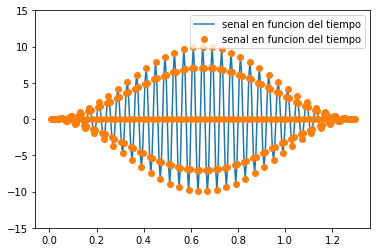

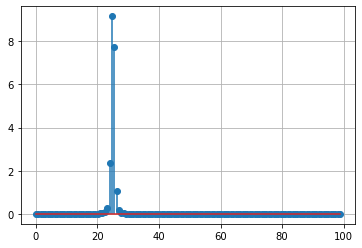

In [45]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.005 # paso de tiempo
df = 1/dt # frecuencia de muestreo
N1 = 260 # numero de puntos
T1 = dt*N1 # tiempo final
t = np.arange(dt, T1,dt) # discretizacion temporal
t2 = np.linspace(dt, T1, N1, endpoint=True)
x = 10*np.sin(50*np.pi*t) # senal disretizada

#aplicar ventana
n=1
x = x*(0.5*(1-np.cos(2*np.pi*t/T1)))
n=2 #factor de correcion

# plots..
plt.figure()
plt.plot(t, x, label = 'senal en funcion del tiempo')
plt.plot(t, x,'o' ,label = 'senal en funcion del tiempo')
#plt.scatter(t, x, label ='puntos discretos', c='r')
plt.ylim(-15, 15)
plt.legend()
plt.show()

from scipy.fft import fft, fftfreq

xf_crudo = n*fft(x) # el criterio es : - amplitud constante: multiup;lciar por 2; potencia constante : multiplicar por 3/8
w_crudo = fftfreq(len(t), dt)

# tenemos que hacer ciuertas manipuaciones a estos arrays para conseguir solo frecuencias postivas y que ademas se converve la energia

xf = 2/len(xf_crudo)*np.abs(xf_crudo[0:len(xf_crudo)//2])
wf = w_crudo[:len(w_crudo)//2]

plt.stem(wf, xf)
plt.grid()
plt.show()

4.	Para la señal x(t) = 10 sen 50π t , genere dos señales:

a)	Considerando 256 puntos de tiempo, con un  dt = 0.005  
b)	Considerando 256 puntos de tiempo, con un  dt = 0.035

Grafique la forma de onda y la FTT de ambas señales en un mismo gráfico (un gráfico para la forma de onda y otro para FFT). Comente y analice los resultados. 


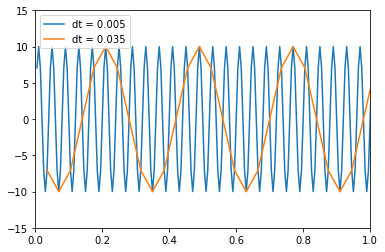

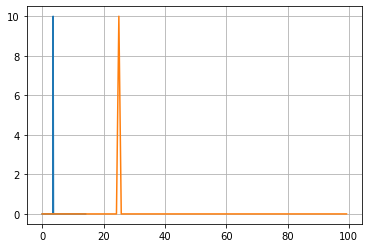

In [47]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.005 # paso de tiempo
dt2 = 0.035
df = 1/dt # frecuencia de muestreo
N1 = 256 # numero de puntos
T1 = dt*N1 # tiempo final
T2 = dt2*N1
t = np.arange(dt, T1,dt) # discretizacion temporal
t2 = np.linspace(dt2, T2, N1, endpoint=True)
x = 10*np.sin(50*np.pi*t) # senal disretizada
x2 = 10*np.sin(50*np.pi*t2)

# plots..
plt.figure()
plt.plot(t, x, label = 'dt = 0.005')
plt.plot(t2, x2 ,label = 'dt = 0.035')
#plt.scatter(t, x, label ='puntos discretos', c='r')
plt.ylim(-15, 15)
plt.xlim(0,1)
plt.legend()
plt.show()

from scipy.fft import fft, fftfreq

xf_crudo = fft(x)
w_crudo = fftfreq(len(t), dt)


xf_crudo2 = fft(x2)
w_crudo2 = fftfreq(len(t2), dt2)

# tenemos que hacer ciuertas manipuaciones a estos arrays para conseguir solo frecuencias postivas y que ademas se converve la energia
xf = 2/len(xf_crudo)*np.abs(xf_crudo[0:len(xf_crudo)//2])
wf = w_crudo[:len(w_crudo)//2]


xf2 = 2/len(xf_crudo2)*np.abs(xf_crudo2[0:len(xf_crudo2)//2])
wf2 = w_crudo2[:len(w_crudo2)//2]

plt.figure(2)
plt.plot(wf2, xf2)
plt.plot(wf, xf)
plt.grid()
plt.show()

segun nyquist, la frecuecnia de muestreo debe ser mayor a por lo menos 2 veces la frecuecnai que max que deseo caputar.



In [48]:
fs1 = 1/dt
fs2 = 1/dt2
print(fs1, fs2)

200.0 28.57142857142857


la frecuecnia 1 es de 200 hz, que es mayor al dboel de 25 hz (goood), por otro lado la otra es de 28.5 que no es mayor al doble de 25 hz

5.	Determine la TDF de x(t) = 10 abs (sen 50π t). Discretizar para t = 5 x 10-3, 10x10-3, ... 1.28 segundos, es decir, tomar 256 puntos (32 ciclos). Grafique (|X(f)|,f), comente y compare ambos resultados.

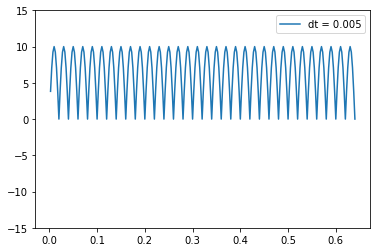

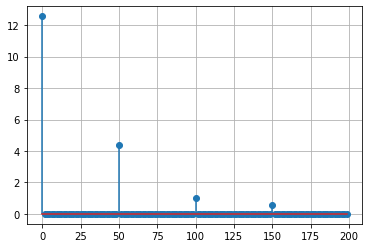

In [51]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.0025 # paso de tiempo
df = 1/dt # frecuencia de muestreo
N1 = 256 # numero de puntos
T1 = dt*N1 # tiempo fina
t = np.arange(dt, T1,dt) # discretizacion temporal
x = 10*np.abs(np.sin(50*np.pi*t)) # senal disretizada


# plots..
plt.figure()
plt.plot(t, x, label = 'dt = 0.005')
#plt.scatter(t, x, label ='puntos discretos', c='r')
plt.ylim(-15, 15)
plt.legend()
plt.show()

from scipy.fft import fft, fftfreq

xf_crudo = fft(x)
w_crudo = fftfreq(len(t), dt)


# tenemos que hacer ciuertas manipuaciones a estos arrays para conseguir solo frecuencias postivas y que ademas se converve la energia
xf = 2/len(xf_crudo)*np.abs(xf_crudo[0:len(xf_crudo)//2])
wf = w_crudo[:len(w_crudo)//2]

plt.figure(2)
plt.stem(wf, xf)
plt.grid()
plt.show()

senal periodica pero no senosoidal, si la senal que entregamos no es senoidal , el fenomenoq ue ocurre sirve en un futuro para identificar falla

presenciad e armonicos, los armonicos ocurren cuando le entragmos a la transformada de fourirer una senal periodica pero no senusoidal

6.	Determinar la TDF de 

x(t) =100	; 0 ≤ t ≤100

x(t) = 0	; 100≤ t ≤1000


Discretizar con Δt=1 seg. ¿Es el resultado esperado? Comente


esta es una senal escalon, le vamos a entregar a la trasnformada de fourier una senal de estas caracteristicas, no es sinosoidal, y tampoco es periodica.



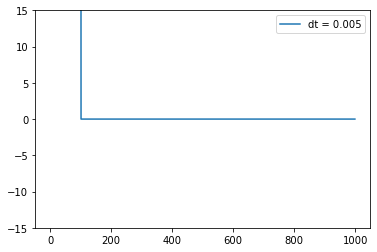

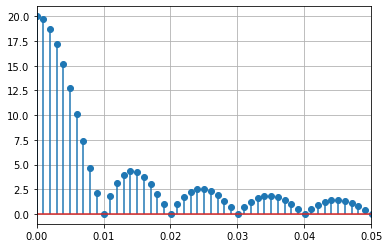

In [55]:
import numpy as np
import matplotlib.pyplot as plt

dt = 1 # paso de tiempo
df = 1/dt # frecuencia de muestreo
N1 = 1000 # numero de puntos
T1 = dt*N1 # tiempo fina
t = np.arange(dt, T1,dt) # discretizacion temporal
x1 = 100*np.ones(100)
x2 = np.zeros(N1- 101)
x = np.concatenate((x1,x2), axis=0)


# plots..
plt.figure()
plt.plot(t, x, label = 'dt = 0.005')
#plt.scatter(t, x, label ='puntos discretos', c='r')
plt.ylim(-15, 15)
plt.legend()
plt.show()

from scipy.fft import fft, fftfreq

xf_crudo = fft(x)
w_crudo = fftfreq(len(t), dt)


# tenemos que hacer ciuertas manipuaciones a estos arrays para conseguir solo frecuencias postivas y que ademas se converve la energia
xf = 2/len(xf_crudo)*np.abs(xf_crudo[0:len(xf_crudo)//2])
wf = w_crudo[:len(w_crudo)//2]

plt.figure(2)
plt.stem(wf, xf)
plt.xlim(0, 0.05)
plt.grid()
plt.show()

la transfromada de fourioer decae a pulsos de forma exponencial, es u espectro continuo con pulsos a periodo de muestreo, esto debido a que la senal es no periodica.

7.	Grafique y Determine la T.D.F. de una señal aleatoria r(t) (considere una distribución normal, con un valor medio de 0.2 y una desviación estándar de 2, para un tiempo de 0 a 0.512 segundos con 512 puntos)

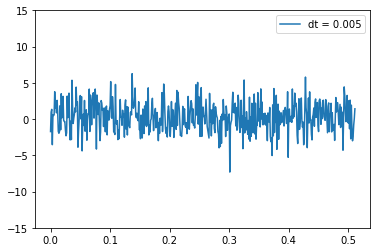

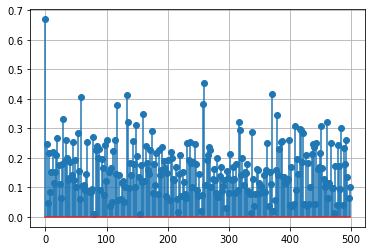

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

 # paso de tiempo
 # frecuencia de muestreo
N1 = 512 # numero de puntos
T1 = 0.512 # tiempo final
dt = T1/N1
df = 1/dt
t = np.arange(0, T1,dt) # discretizacion temporal
x = np.random.normal(0.2, 2, N1)



# plots..
plt.figure()
plt.plot(t, x, label = 'dt = 0.005')
#plt.scatter(t, x, label ='puntos discretos', c='r')
plt.ylim(-15, 15)
plt.legend()
plt.show()



xf_crudo = fft(x)
w_crudo = fftfreq(len(t), dt)


# tenemos que hacer ciuertas manipuaciones a estos arrays para conseguir solo frecuencias postivas y que ademas se converve la energia
xf = 2/len(xf_crudo)*np.abs(xf_crudo[0:len(xf_crudo)//2])
wf = w_crudo[:len(w_crudo)//2]

plt.figure(2)
plt.stem(wf, xf)
plt.grid()
plt.show()


la ergocidad es cuando las propiedades de una senal no cambian en el tiempo, sus propiedades estadisticas.

el ruido se puede cancelar si promediamos las senal

ademas la transformada de fourier es dificl de interpretar o directamente no tiene sentido alguno

8.	Considere la señal asociada a la falla de la pista externa de un rodamiento

s(t) = 0.4sin(2pi BPFO t) + 0.5sin(2pi 2 BPFO t) + 0.3sin(2pi 3 BPFO t)
 

Donde BPFO (Ball Pass Frequency Outer) = 39.0625 [Hz]. Construya la función r(t)+s(t). Promedie 100 espectros de la señal. Comente y compare el resultado con y sin promedios.


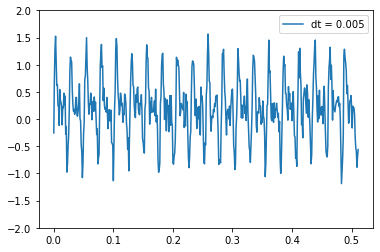

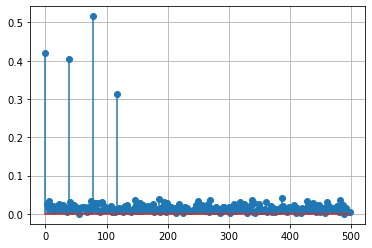

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# la freq max es de 3*BPFO = 118 hz , eso implica que mi frecuencia de muestreo tiene qwue ser minimo 2.41 veces mayor , para ser holgado 360 hz

BPFO = 39.0625
fs = 1000 #hz
dt = 1/fs
T1 = 0.512 # tiempo final
t = np.arange(0, T1,dt) # discretizacion tempora
N1 = len(t)


cantidad_de_senales = 100
S = np.zeros((cantidad_de_senales, len(t)))

for i in range(cantidad_de_senales):
    r = np.random.normal(0.2, 2, N1)
    y = 0.4*np.sin(2*np.pi*BPFO*t) + 0.5*np.sin(2*np.pi*2*BPFO*t) + 0.3*np.sin(2*np.pi*3*BPFO*t)
    s = r + y
    S[i] = s

x = np.sum(S, axis=0)/cantidad_de_senales




# plots..
plt.figure()
plt.plot(t, x, label = 'dt = 0.005')
#plt.scatter(t, x, label ='puntos discretos', c='r')
plt.ylim(-2, 2)
plt.legend()
plt.show()



xf_crudo = fft(x)
w_crudo = fftfreq(len(t), dt)


# tenemos que hacer ciuertas manipuaciones a estos arrays para conseguir solo frecuencias postivas y que ademas se converve la energia
xf = 2/len(xf_crudo)*np.abs(xf_crudo[0:len(xf_crudo)//2])
wf = w_crudo[:len(w_crudo)//2]

plt.figure(2)
plt.stem(wf, xf)
plt.grid()
plt.show()

In [112]:
S= np.zeros ((4,2))
S[0] = (2,3)
S[1] = (1,0)
S[2] = (6,-1)
S[3] = (2,-9)

a = np.sum(S, axis=0)/4
a

array([ 2.75, -1.75])

cuando se tien ruidio , se debe oriomediar par apoder conseguir lka senal buenas, en los casos de prueba de impaacto, si se tiene mucho amortiguamiento es difcil camopartar las freciuecnais en ea transformada de fourir.